# Accessibility and Human Factors in Plotting

Whenever you are generating plots to go into a paper or a presentation, there are a few things you can do to make sure that everyone can understand your plots:

## 1. Always make sure your text is large enough to read

- In Matplotlib `plot` commands, Use the `fontsize` parameter in `xlabel`, `ylabel`, `title`, and `legend`, and `tick_params` with `labelsize` to increase the text size of the numbers on your axes.

## 2. Make graph elements easy to see    
- Similarly, you should make the lines and symbols in your plots themselves bit enough to see comfortably. In Matplotlib `plot` commands, you can use `s` to increase the size of your scatterplot markers and `linewidth` to increase the sizes of your plot lines.

### Seaborn contexts
Seaborn has a number of built-in features to aid in generating accessible plots. One feature is *contexts*, which provide a convenient way scale both text and plot elements all at once. This is done using the `sns.set_context()` function. Contexts refer to different situations in which you might want to use a plot, such as in a paper versus a slide presentation or conference poster. 

<!-- <div class="alert alert-block alert-info">
If you import seaborn and run `sns.set_context()`, it affects *all* Matplotlib plots, not just those made with seaborn. 
    </div> -->

Here's some code to plot some sine waves using Matplotlib. Seaborn contexts will apply not just to Seaborn plots, but to any Matplotlib plots you make after you set the context.

In [1]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

# A simple function for plotting sine waves
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
    plt.title('Sine Waves')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

### Plot with default styling

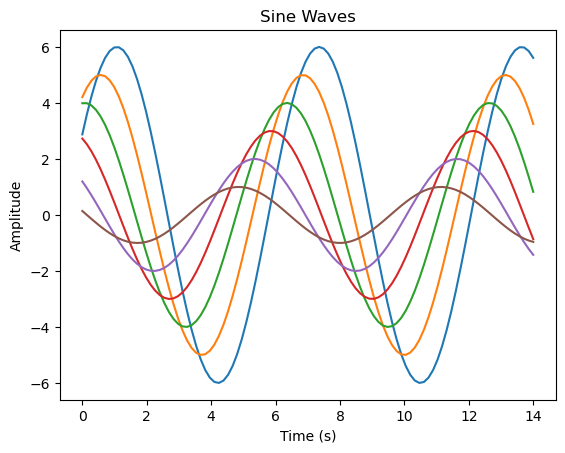

In [2]:
sinplot()

### Plot with `paper` context

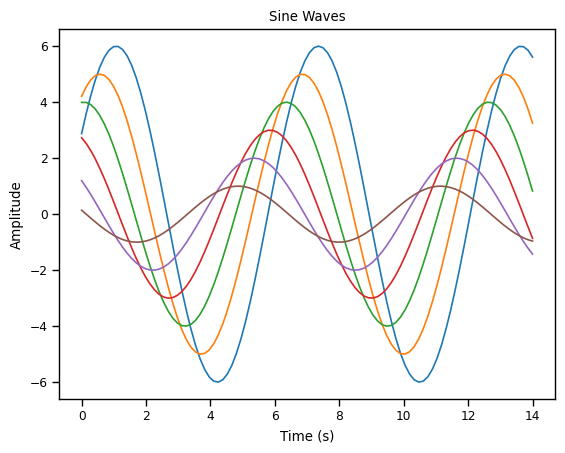

In [3]:
sns.set_context("paper")
sinplot()

### Plot with `talk` context

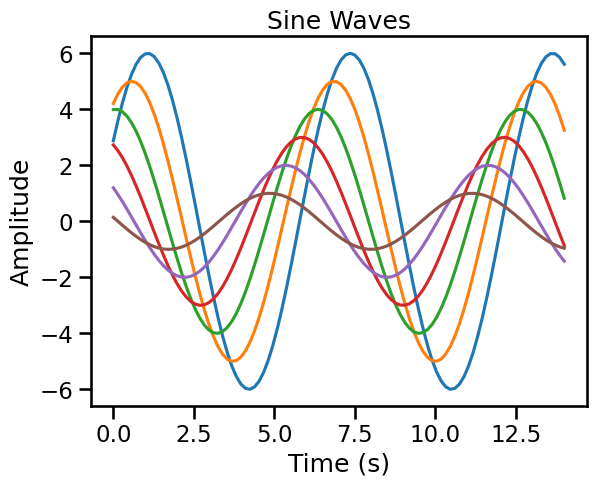

In [4]:
sns.set_context("talk")
sinplot()

### Plot with `poster` context

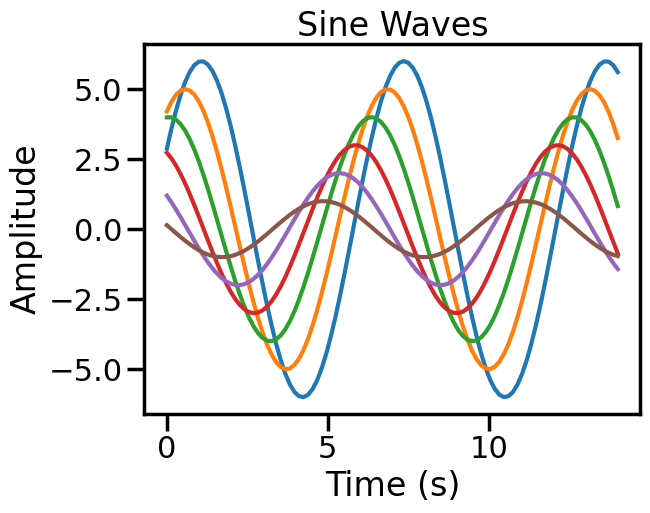

In [5]:
sns.set_context("poster")
sinplot()

## 3. Consider colorblindness

A non-negligible proportion of the population has some form of colorblindness. Human color perception relies on our having three different types of cone cells in our retinas. It is estimated that 8% of males (1 in 12) have some form of colorblindness, typically a genetic absence of one of these cone types. colorblindness is caused by a recessive gene on the X chromosome, so it is far less common for females to have it. So if you anticipate that, say, even 50 people view a graph you make, the odds are that 2 or more of them will have some form of colorblindness. Or put another way, if there are 20 people enrolled in this class, there is likely at least one colorblind student. 

colorblindness can range from mild forms (common) such as deuteranopia and protanopia (missing green or red cones, respectively; inability to distinguish red and green), and tritanopoa (missing blue cones) to complete achromatopsia (rare). 

**Using color (and nothing else) to distinguish between different plot elements (like lines representing different categories) may make your plots *unreadable* to anyone who is colorblind**. For lines, the `linestyle` parameter lets you use different types of lines. For scatterplots, `marker` lets you change the shape of your points for different categories. 

It's worth trying out [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) or [Color Oracle](https://colororacle.org/) to simulate what your plots (or any other image) would look like to those with colorblindness. This can be educational, and also a useful tool to check your plots. However, there are many color palettes available in Matplotlib and Seaborn (including the defaults) that are designed to be distinguishable even by people with mild colorblindness. Install Color Oracle on your computer and view this page, and see what the Seaborn plots above look. like! 

Matplotlib has an [excellent page](https://matplotlib.org/stable/tutorials/colors/colormaps.html) on choosing colormaps. 

But as usual, Seaborn provides an even simpler option. It's default color palette is quite robust to different forms of colorblindness (i.e., most hues are distinguishable from each other), and it also offers a `colorblind` palette that is a slightly-adjusted version of the default that makes the hues even more distinguishable. Seaborn's developer, Markus Waksom, also provides [a page simulating what the Seaborn palettes look like with different forms of colorblindness](https://gist.github.com/mwaskom/b35f6ebc2d4b340b4f64a4e28e778486).


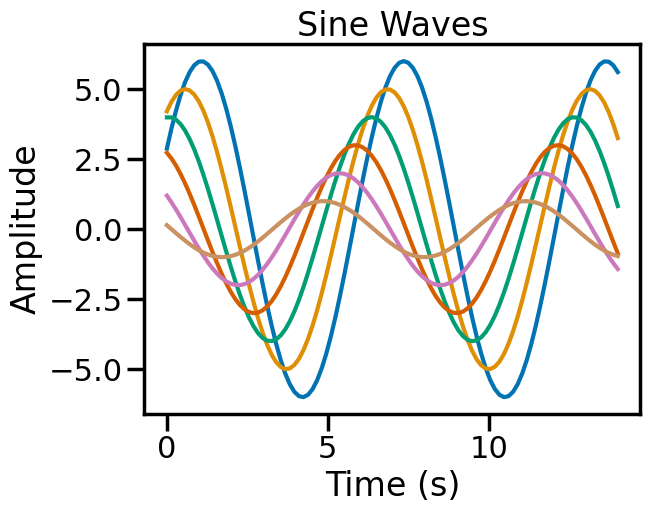

In [6]:
sns.set_palette('colorblind')
sinplot()

:::{caution}
Once you've run `sns.set_context()` and/or `sns.set_palette()`, the setting apply to *all* further plots until you change the settings by running those commands again (or restarting the kernel)
:::

Below you can see that even without repeating the `sns.set_context()` command, the `colorblind` palette is still in effect:

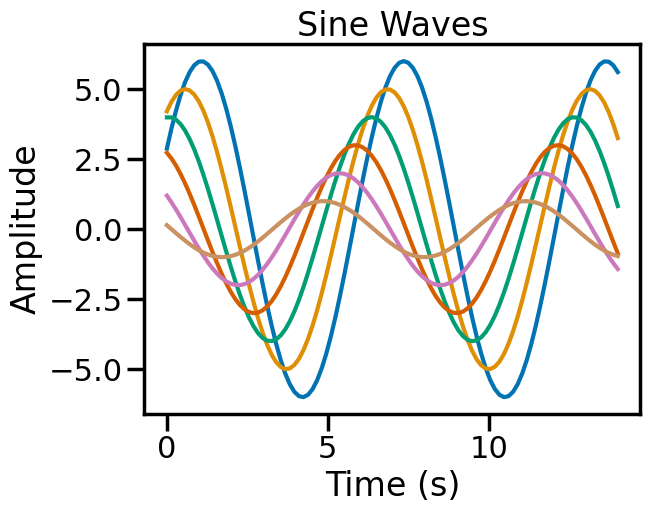

In [7]:
sinplot()

But if we specify a different palette and/or context, these will be used:

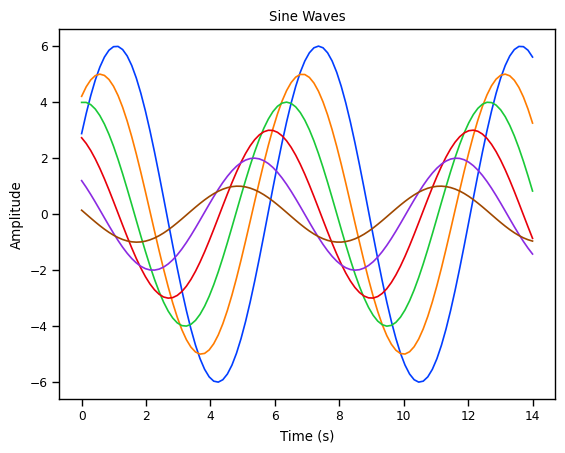

In [8]:
sns.set_palette('bright')
sns.set_context('paper')
sinplot()

If you want to go back to the default context, you can use `sns.set_context('notebook')`. 

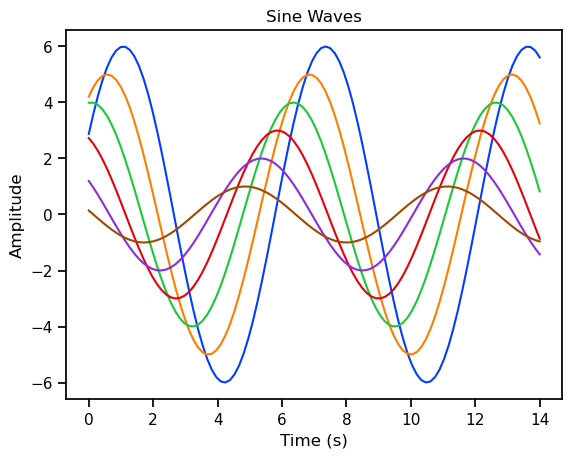

In [9]:
sns.set_context('notebook')
sinplot()

If you want to go back to the default color palette (which is also Matplotlib's default), you can use `sns.set_palette('tab10')`

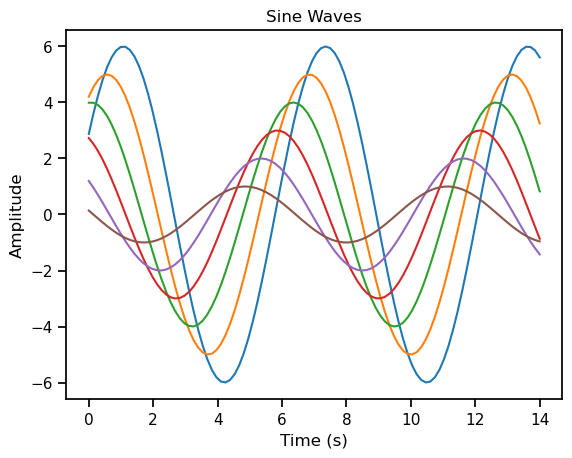

In [10]:
sns.set_palette('tab10')
sinplot()

## 4. Write Alt Text for your plots

People with vision impairment shuold not be excluded from understanding your plots. Many people with vision impairment use screen readers to read text on the web. Since you never know who will read your work, and you should always strive for maximum accessibility, you should always include *alt text* for your plots when you are preparing them for dissemination (i.e., for others to consume). Alt text is a brief description of the plot that will be read by the screen reader.

For example, alt text for the above plot could be:

> A set of 6 sine waves plotted on 1 axis. The x-axis, time in seconds, ranges from 0 to 14, and the y-axis, amplitude, from -6 to 6. All sine waves have the same frequency, with 3 peaks and 2 troughs, but each has a different phase and amplitude.

Unfortunately, at this time there is no way to include alt text in a Jupyter notebook. The Jupyter development community is aware of this issue and discussing how best to implement it. However, the reality is that it is rare that the final published output of a data science project is a Jupyter notebook; typically, we do our data science work in notebooks, and then export specific figures for inclusion in a manuscript, presentaiton, poster, web page, etc.. So the main thing is to be aware that generating alt text is an important part of making your work accessible, and to remember to do it when you are preparing your figures for publication.

It's also worth noting that alt text is not necessarily simple to generate for scientific plots. It's not just a matter of describing what is in the plot, but also what the plot is meant to convey. For example, if you have a plot showing the relationship between two variables, you should describe the relationship, not just the plot itself. At the same time, alt text must be concise — typically no more than a couple of sentences. Some publications do allow for including an adiditonal, longer text description of the plot, but this is not usable by all screed readers, so should be avoided where possible. Some interesting work ([Singh et al., 2024](https://dl.acm.org/doi/10.1145/3640543.3645212)) has considered how AI can be used to generate alt text for plots, but this is still in the research stage. 